# Early Stoppint / Callback /Weight Load

## Regression model - 자동차 연비 예측

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### dataset download

In [2]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
column_names = ['연비', '기통', '배기량', '마력', '무게', '가속력', '모델연도', '생산국']

In [4]:
dataset = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True )
dataset.head()

,연비,기통,배기량,마력,무게,가속력,모델연도,생산국
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset = pd.get_dummies(dataset, columns=["생산국"])
dataset.head()

,연비,기통,배기량,마력,무게,가속력,모델연도,생산국_1,생산국_2,생산국_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [6]:
label = dataset.pop('연비')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
기통       398 non-null int64
배기량      398 non-null float64
마력       392 non-null float64
무게       398 non-null float64
가속력      398 non-null float64
모델연도     398 non-null int64
생산국_1    398 non-null uint8
생산국_2    398 non-null uint8
생산국_3    398 non-null uint8
dtypes: float64(4), int64(2), uint8(3)
memory usage: 19.9 KB


### train, test 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset.values, label.values)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(298, 9)
(100, 9)
(298,)
(100,)


In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

### Model Build

In [11]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(9,)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

### Train the model

1000 epoch 을 수행하고 training 과 validation accuarcy 를 history object 에 저장

In [12]:
model = build_model()
history = model.fit(train_ds, epochs=1000, validation_data=test_ds, verbose=1)

Epoch 1/1000
10/10 [==============================] - 1s 106ms/step - loss: 621.0782 - mse: 620.6676 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 13ms/step - loss: 617.3450 - mse: 617.2316 - val_loss: 569.8759 - val_mse: 576.8117
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 610.5428 - mse: 613.6300 - val_loss: 566.2095 - val_mse: 573.1462
Epoch 4/1000
10/10 [==============================] - 0s 14ms/step - loss: 615.4953 - mse: 609.7318 - val_loss: 562.2711 - val_mse: 569.2088
Epoch 5/1000
10/10 [==============================] - 0s 14ms/step - loss: 603.5772 - mse: 605.5552 - val_loss: 557.9362 - val_mse: 564.8751
Epoch 6/1000
10/10 [==============================] - 0s 14ms/step - loss: 599.6246 - mse: 601.0212 - val_loss: 553.3609 - val_mse: 560.3010
Epoch 7/1000
10/10 [==============================] - 0s 14ms/step - loss: 594.5935 - mse: 596.1795 - val_loss: 548.4364 - val_mse: 555.3777
Epoch 8/

Epoch 59/1000
10/10 [==============================] - 0s 13ms/step - loss: 136.7833 - mse: 139.0833 - val_loss: 105.9345 - val_mse: 113.0483
Epoch 60/1000
10/10 [==============================] - 0s 13ms/step - loss: 133.6944 - mse: 131.6797 - val_loss: 99.5473 - val_mse: 106.6661
Epoch 61/1000
10/10 [==============================] - 0s 14ms/step - loss: 125.1224 - mse: 124.8701 - val_loss: 93.1153 - val_mse: 100.2393
Epoch 62/1000
10/10 [==============================] - 0s 14ms/step - loss: 119.0046 - mse: 118.0897 - val_loss: 87.1121 - val_mse: 94.2414
Epoch 63/1000
10/10 [==============================] - 0s 14ms/step - loss: 110.5950 - mse: 111.7539 - val_loss: 81.3134 - val_mse: 88.4481
Epoch 64/1000
10/10 [==============================] - 0s 14ms/step - loss: 106.1586 - mse: 105.7039 - val_loss: 76.1739 - val_mse: 83.3138
Epoch 65/1000
10/10 [==============================] - 0s 13ms/step - loss: 99.9980 - mse: 100.1626 - val_loss: 71.2981 - val_mse: 78.4433
Epoch 66/1000
10/

10/10 [==============================] - 0s 13ms/step - loss: 62.7398 - mse: 64.1059 - val_loss: 44.6942 - val_mse: 51.9083
Epoch 119/1000
10/10 [==============================] - 0s 14ms/step - loss: 61.2503 - mse: 64.1150 - val_loss: 44.7819 - val_mse: 51.9968
Epoch 120/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.4960 - mse: 64.0986 - val_loss: 44.6555 - val_mse: 51.8693
Epoch 121/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.2117 - mse: 64.0526 - val_loss: 44.5617 - val_mse: 51.7744
Epoch 122/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.1589 - mse: 64.1022 - val_loss: 44.6541 - val_mse: 51.8678
Epoch 123/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.7589 - mse: 64.0685 - val_loss: 44.6040 - val_mse: 51.8172
Epoch 124/1000
10/10 [==============================] - 0s 13ms/step - loss: 62.5351 - mse: 64.1131 - val_loss: 44.6398 - val_mse: 51.8534
Epoch 125/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 63.4657 - mse: 64.1075 - val_loss: 44.5213 - val_mse: 51.7336
Epoch 178/1000
10/10 [==============================] - 0s 14ms/step - loss: 65.1352 - mse: 64.1507 - val_loss: 44.5391 - val_mse: 51.7516
Epoch 179/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.8360 - mse: 64.1113 - val_loss: 44.4936 - val_mse: 51.7056
Epoch 180/1000
10/10 [==============================] - 0s 16ms/step - loss: 64.7542 - mse: 64.0832 - val_loss: 44.4672 - val_mse: 51.6788
Epoch 181/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.9267 - mse: 64.0961 - val_loss: 44.5654 - val_mse: 51.7783
Epoch 182/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.7795 - mse: 64.1273 - val_loss: 44.5552 - val_mse: 51.7679
Epoch 183/1000
10/10 [==============================] - 0s 15ms/step - loss: 65.0927 - mse: 64.0839 - val_loss: 44.5134 - val_mse: 51.7256
Epoch 184/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 64.0570 - mse: 64.0789 - val_loss: 44.6864 - val_mse: 51.9005
Epoch 237/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.4246 - mse: 64.1382 - val_loss: 44.7210 - val_mse: 51.9354
Epoch 238/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.4596 - mse: 64.0897 - val_loss: 44.6149 - val_mse: 51.8282
Epoch 239/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.3076 - mse: 64.0792 - val_loss: 44.5686 - val_mse: 51.7814
Epoch 240/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.4805 - mse: 64.1186 - val_loss: 44.6626 - val_mse: 51.8764
Epoch 241/1000
10/10 [==============================] - 0s 15ms/step - loss: 64.9074 - mse: 64.0525 - val_loss: 44.6540 - val_mse: 51.8678
Epoch 242/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.3464 - mse: 64.1136 - val_loss: 44.7354 - val_mse: 51.9499
Epoch 243/1000
10/10 [====================

10/10 [==============================] - 0s 14ms/step - loss: 64.1825 - mse: 64.1525 - val_loss: 44.4047 - val_mse: 51.6153
Epoch 296/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.1658 - mse: 64.1701 - val_loss: 44.4617 - val_mse: 51.6733
Epoch 297/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2226 - mse: 64.0560 - val_loss: 44.5784 - val_mse: 51.7914
Epoch 298/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2061 - mse: 64.1067 - val_loss: 44.5061 - val_mse: 51.7182
Epoch 299/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.0514 - mse: 64.0941 - val_loss: 44.5335 - val_mse: 51.7460
Epoch 300/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.3469 - mse: 64.0695 - val_loss: 44.6233 - val_mse: 51.8367
Epoch 301/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.9514 - mse: 64.1022 - val_loss: 44.5818 - val_mse: 51.7948
Epoch 302/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 64.0712 - mse: 64.0578 - val_loss: 44.6833 - val_mse: 51.8974
Epoch 355/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.3187 - mse: 64.0696 - val_loss: 44.7279 - val_mse: 51.9423
Epoch 356/1000
10/10 [==============================] - 0s 13ms/step - loss: 62.9159 - mse: 64.0977 - val_loss: 44.7292 - val_mse: 51.9436
Epoch 357/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.7809 - mse: 64.1441 - val_loss: 44.6171 - val_mse: 51.8304
Epoch 358/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.1790 - mse: 64.0580 - val_loss: 44.5913 - val_mse: 51.8044
Epoch 359/1000
10/10 [==============================] - 0s 13ms/step - loss: 62.9079 - mse: 64.0852 - val_loss: 44.6916 - val_mse: 51.9057
Epoch 360/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.0347 - mse: 64.1061 - val_loss: 44.7417 - val_mse: 51.9563
Epoch 361/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 64.2486 - mse: 64.0684 - val_loss: 44.6370 - val_mse: 51.8506
Epoch 414/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.8778 - mse: 64.1174 - val_loss: 44.6471 - val_mse: 51.8607
Epoch 415/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.5483 - mse: 64.1284 - val_loss: 44.6913 - val_mse: 51.9054
Epoch 416/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.3943 - mse: 64.1016 - val_loss: 44.6769 - val_mse: 51.8908
Epoch 417/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.5018 - mse: 64.1934 - val_loss: 44.6352 - val_mse: 51.8488
Epoch 418/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.7219 - mse: 64.0796 - val_loss: 44.7119 - val_mse: 51.9262
Epoch 419/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.4821 - mse: 64.0588 - val_loss: 44.6894 - val_mse: 51.9035
Epoch 420/1000
10/10 [====================

10/10 [==============================] - 0s 14ms/step - loss: 64.9431 - mse: 64.1198 - val_loss: 44.5369 - val_mse: 51.7494
Epoch 473/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.2682 - mse: 64.0496 - val_loss: 44.5436 - val_mse: 51.7561
Epoch 474/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.5778 - mse: 64.0998 - val_loss: 44.5005 - val_mse: 51.7125
Epoch 475/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.6557 - mse: 64.0557 - val_loss: 44.5836 - val_mse: 51.7966
Epoch 476/1000
10/10 [==============================] - 0s 15ms/step - loss: 64.8635 - mse: 64.1045 - val_loss: 44.5380 - val_mse: 51.7505
Epoch 477/1000
10/10 [==============================] - 0s 16ms/step - loss: 64.6295 - mse: 64.1005 - val_loss: 44.5116 - val_mse: 51.7238
Epoch 478/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.8338 - mse: 64.0872 - val_loss: 44.4962 - val_mse: 51.7082
Epoch 479/1000
10/10 [====================

10/10 [==============================] - 0s 14ms/step - loss: 64.5483 - mse: 64.0907 - val_loss: 44.5681 - val_mse: 51.7809
Epoch 532/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.0022 - mse: 64.0812 - val_loss: 44.6171 - val_mse: 51.8304
Epoch 533/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.0146 - mse: 64.0617 - val_loss: 44.7161 - val_mse: 51.9304
Epoch 534/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.0400 - mse: 64.0739 - val_loss: 44.7001 - val_mse: 51.9142
Epoch 535/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.1921 - mse: 64.0882 - val_loss: 44.7949 - val_mse: 52.0099
Epoch 536/1000
10/10 [==============================] - 0s 13ms/step - loss: 65.2249 - mse: 64.0783 - val_loss: 44.7458 - val_mse: 51.9604
Epoch 537/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.4303 - mse: 64.0952 - val_loss: 44.7319 - val_mse: 51.9463
Epoch 538/1000
10/10 [====================

10/10 [==============================] - 0s 14ms/step - loss: 63.9891 - mse: 64.0683 - val_loss: 44.5383 - val_mse: 51.7508
Epoch 591/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.4003 - mse: 64.0647 - val_loss: 44.6208 - val_mse: 51.8342
Epoch 592/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.7316 - mse: 64.0552 - val_loss: 44.5209 - val_mse: 51.7332
Epoch 593/1000
10/10 [==============================] - 0s 13ms/step - loss: 62.5987 - mse: 64.1392 - val_loss: 44.6239 - val_mse: 51.8374
Epoch 594/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2507 - mse: 64.0831 - val_loss: 44.6151 - val_mse: 51.8285
Epoch 595/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.7631 - mse: 64.0566 - val_loss: 44.6040 - val_mse: 51.8172
Epoch 596/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.3639 - mse: 64.1003 - val_loss: 44.6787 - val_mse: 51.8926
Epoch 597/1000
10/10 [====================

10/10 [==============================] - 0s 15ms/step - loss: 62.7800 - mse: 64.0963 - val_loss: 44.6158 - val_mse: 51.8291
Epoch 650/1000
10/10 [==============================] - 0s 13ms/step - loss: 65.1790 - mse: 64.0924 - val_loss: 44.6570 - val_mse: 51.8708
Epoch 651/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2856 - mse: 64.0952 - val_loss: 44.6151 - val_mse: 51.8285
Epoch 652/1000
10/10 [==============================] - 0s 14ms/step - loss: 65.1444 - mse: 64.0889 - val_loss: 44.6389 - val_mse: 51.8525
Epoch 653/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.4916 - mse: 64.0822 - val_loss: 44.7119 - val_mse: 51.9262
Epoch 654/1000
10/10 [==============================] - 0s 14ms/step - loss: 65.0123 - mse: 64.1420 - val_loss: 44.6459 - val_mse: 51.8595
Epoch 655/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2065 - mse: 64.1322 - val_loss: 44.6911 - val_mse: 51.9052
Epoch 656/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 64.2911 - mse: 64.0862 - val_loss: 44.6110 - val_mse: 51.8243
Epoch 709/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.9621 - mse: 64.0813 - val_loss: 44.6538 - val_mse: 51.8675
Epoch 710/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.1816 - mse: 64.1026 - val_loss: 44.5632 - val_mse: 51.7760
Epoch 711/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.6048 - mse: 64.1065 - val_loss: 44.5336 - val_mse: 51.7461
Epoch 712/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.4929 - mse: 64.1617 - val_loss: 44.5303 - val_mse: 51.7427
Epoch 713/1000
10/10 [==============================] - 0s 13ms/step - loss: 62.4727 - mse: 64.0882 - val_loss: 44.6073 - val_mse: 51.8205
Epoch 714/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.0828 - mse: 64.0509 - val_loss: 44.6912 - val_mse: 51.9053
Epoch 715/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 63.6258 - mse: 64.0776 - val_loss: 44.6263 - val_mse: 51.8398
Epoch 768/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.5479 - mse: 64.1452 - val_loss: 44.5614 - val_mse: 51.7741
Epoch 769/1000
10/10 [==============================] - 0s 16ms/step - loss: 63.4680 - mse: 64.0743 - val_loss: 44.6352 - val_mse: 51.8487
Epoch 770/1000
10/10 [==============================] - 0s 15ms/step - loss: 64.7238 - mse: 64.0897 - val_loss: 44.6328 - val_mse: 51.8464
Epoch 771/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.1943 - mse: 64.1170 - val_loss: 44.6934 - val_mse: 51.9075
Epoch 772/1000
10/10 [==============================] - 0s 14ms/step - loss: 65.5868 - mse: 64.0892 - val_loss: 44.6815 - val_mse: 51.8955
Epoch 773/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.4648 - mse: 64.1126 - val_loss: 44.5581 - val_mse: 51.7708
Epoch 774/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 63.8373 - mse: 64.0969 - val_loss: 44.5845 - val_mse: 51.7975
Epoch 827/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.4711 - mse: 64.0592 - val_loss: 44.6784 - val_mse: 51.8924
Epoch 828/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.1556 - mse: 64.1162 - val_loss: 44.7280 - val_mse: 51.9424
Epoch 829/1000
10/10 [==============================] - 0s 15ms/step - loss: 64.5396 - mse: 64.1017 - val_loss: 44.7059 - val_mse: 51.9201
Epoch 830/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.6878 - mse: 64.0888 - val_loss: 44.6512 - val_mse: 51.8650
Epoch 831/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.3163 - mse: 64.1104 - val_loss: 44.6300 - val_mse: 51.8435
Epoch 832/1000
10/10 [==============================] - 0s 14ms/step - loss: 64.2206 - mse: 64.1002 - val_loss: 44.6810 - val_mse: 51.8950
Epoch 833/1000
10/10 [====================

10/10 [==============================] - 0s 13ms/step - loss: 63.2458 - mse: 64.1098 - val_loss: 44.5611 - val_mse: 51.7739
Epoch 886/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.5296 - mse: 64.0856 - val_loss: 44.4897 - val_mse: 51.7016
Epoch 887/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.6108 - mse: 64.0793 - val_loss: 44.6217 - val_mse: 51.8351
Epoch 888/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.5602 - mse: 64.1191 - val_loss: 44.6989 - val_mse: 51.9130
Epoch 889/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.3429 - mse: 64.0945 - val_loss: 44.6558 - val_mse: 51.8696
Epoch 890/1000
10/10 [==============================] - 0s 14ms/step - loss: 62.7895 - mse: 64.0889 - val_loss: 44.7102 - val_mse: 51.9245
Epoch 891/1000
10/10 [==============================] - 0s 14ms/step - loss: 65.2649 - mse: 64.0509 - val_loss: 44.6707 - val_mse: 51.8846
Epoch 892/1000
10/10 [====================

10/10 [==============================] - 0s 14ms/step - loss: 64.9020 - mse: 64.0540 - val_loss: 44.5906 - val_mse: 51.8037
Epoch 945/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.6517 - mse: 64.0882 - val_loss: 44.5637 - val_mse: 51.7765
Epoch 946/1000
10/10 [==============================] - 0s 13ms/step - loss: 63.6711 - mse: 64.1160 - val_loss: 44.5626 - val_mse: 51.7754
Epoch 947/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.6183 - mse: 64.1224 - val_loss: 44.5158 - val_mse: 51.7281
Epoch 948/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.7677 - mse: 64.1017 - val_loss: 44.5574 - val_mse: 51.7701
Epoch 949/1000
10/10 [==============================] - 0s 13ms/step - loss: 64.2203 - mse: 64.0466 - val_loss: 44.6439 - val_mse: 51.8575
Epoch 950/1000
10/10 [==============================] - 0s 14ms/step - loss: 63.9318 - mse: 64.0817 - val_loss: 44.7557 - val_mse: 51.9703
Epoch 951/1000
10/10 [====================

### history 시각화

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):

    fig = plt.figure()
    plt.plot(history.history['mse'], label='mean_squared_error')
    plt.plot(history.history['val_mse'], label='val_mean_squared_error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error [MPG]')
    plt.legend()

    fig = plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss[MPG]')
    plt.legend()

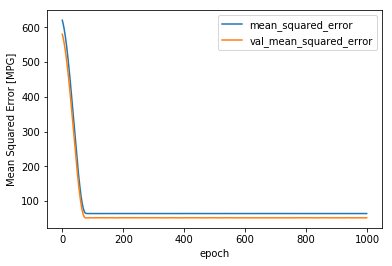

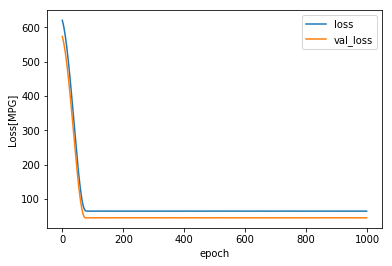

In [14]:
plot_history(history)

### Early Stopping

**더 이상 학습이 진행되지 않으면 traing 중간에 early stop 시킨다**

In [15]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_ds, epochs=1000, validation_data=test_ds, verbose=1, callbacks=[early_stop])

Epoch 1/1000
10/10 [==============================] - 1s 64ms/step - loss: 620.1930 - mse: 622.0361 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 14ms/step - loss: 620.7925 - mse: 618.5093 - val_loss: 571.6440 - val_mse: 578.5793
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 618.1897 - mse: 615.8260 - val_loss: 568.9274 - val_mse: 575.8634
Epoch 4/1000
10/10 [==============================] - 0s 14ms/step - loss: 619.1393 - mse: 612.9283 - val_loss: 565.9404 - val_mse: 572.8771
Epoch 5/1000
10/10 [==============================] - 0s 15ms/step - loss: 608.1807 - mse: 609.7391 - val_loss: 562.6184 - val_mse: 569.5560
Epoch 6/1000
10/10 [==============================] - 0s 14ms/step - loss: 604.1879 - mse: 606.2296 - val_loss: 559.0519 - val_mse: 565.9905
Epoch 7/1000
10/10 [==============================] - 0s 14ms/step - loss: 608.9635 - mse: 602.4932 - val_loss: 555.3372 - val_mse: 562.2767
Epoch 8/1

Epoch 59/1000
10/10 [==============================] - 0s 15ms/step - loss: 205.8524 - mse: 204.1824 - val_loss: 167.2103 - val_mse: 174.2859
Epoch 60/1000
10/10 [==============================] - 0s 13ms/step - loss: 194.7683 - mse: 196.0878 - val_loss: 159.4568 - val_mse: 166.5366
Epoch 61/1000
10/10 [==============================] - 0s 13ms/step - loss: 189.0626 - mse: 188.0497 - val_loss: 152.1006 - val_mse: 159.1845
Epoch 62/1000
10/10 [==============================] - 0s 14ms/step - loss: 178.3182 - mse: 180.2770 - val_loss: 144.5570 - val_mse: 151.6453
Epoch 63/1000
10/10 [==============================] - 0s 14ms/step - loss: 175.4230 - mse: 172.5368 - val_loss: 137.6213 - val_mse: 144.7137
Epoch 64/1000
10/10 [==============================] - 0s 15ms/step - loss: 166.2717 - mse: 165.1576 - val_loss: 130.5323 - val_mse: 137.6291
Epoch 65/1000
10/10 [==============================] - 0s 15ms/step - loss: 158.8234 - mse: 157.7976 - val_loss: 123.7476 - val_mse: 130.8488
Epoch 

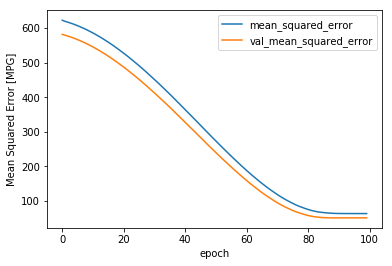

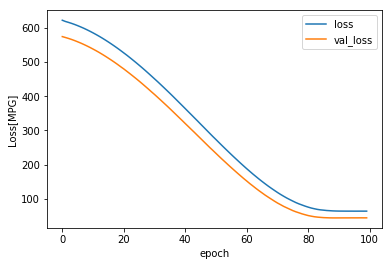

In [16]:
plot_history(history)

### Checkpointing 및 Best Model save

- training 작업이 길어질 경우 중간에 시스템 이상 등으로 termination 될 경우를 대비하여 그 때까지의 훈련된 weight 저장
- checkpoint 시 저장된 weight 부터 load 하여 추가 training  
- callback 함수로 작성

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = 'best_weights.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)

In [18]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_ds, epochs=1000, validation_data=test_ds, verbose=1, callbacks=[early_stop, checkpoint])

Epoch 1/1000
     10/Unknown - 1s 51ms/step - loss: 614.9471 - mse: 613.1215
Epoch 00001: val_loss improved from inf to 572.81531, saving model to best_weights.hdf5
10/10 [==============================] - 1s 68ms/step - loss: 614.9471 - mse: 613.1215 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 562.2885 - mse: 562.2885
Epoch 00002: val_loss improved from 572.81531 to 569.34297, saving model to best_weights.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 622.7060 - mse: 616.6587 - val_loss: 569.3430 - val_mse: 576.2789
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 734.2361 - mse: 734.2361
Epoch 00003: val_loss improved from 569.34297 to 565.77486, saving model to best_weights.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 619.6726 - mse: 613.1008 - val_loss: 565.7749 - val_mse: 572.7117
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss:

Epoch 27/1000
 1/10 [==>...........................] - ETA: 0s - loss: 458.9727 - mse: 458.9727
Epoch 00027: val_loss improved from 412.15738 to 403.13064, saving model to best_weights.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 445.8010 - mse: 449.4960 - val_loss: 403.1306 - val_mse: 410.1134
Epoch 28/1000
 1/10 [==>...........................] - ETA: 0s - loss: 374.0680 - mse: 374.0680
Epoch 00028: val_loss improved from 403.13064 to 394.15720, saving model to best_weights.hdf5
10/10 [==============================] - 0s 16ms/step - loss: 442.5163 - mse: 440.1714 - val_loss: 394.1572 - val_mse: 401.1429
Epoch 29/1000
 1/10 [==>...........................] - ETA: 0s - loss: 422.1660 - mse: 422.1660
Epoch 00029: val_loss improved from 394.15720 to 384.99339, saving model to best_weights.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 430.3401 - mse: 430.9012 - val_loss: 384.9934 - val_mse: 391.9819
Epoch 30/1000
 1/10 [==>......................

Epoch 53/1000
 1/10 [==>...........................] - ETA: 0s - loss: 222.6374 - mse: 222.6374
Epoch 00053: val_loss improved from 169.23570 to 160.97221, saving model to best_weights.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 198.7737 - mse: 198.0019 - val_loss: 160.9722 - val_mse: 168.0512
Epoch 54/1000
 1/10 [==>...........................] - ETA: 0s - loss: 178.0360 - mse: 178.0360
Epoch 00054: val_loss improved from 160.97221 to 152.37223, saving model to best_weights.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 183.4776 - mse: 189.2072 - val_loss: 152.3722 - val_mse: 159.4560
Epoch 55/1000
 1/10 [==>...........................] - ETA: 0s - loss: 231.4865 - mse: 231.4865
Epoch 00055: val_loss improved from 152.37223 to 144.55600, saving model to best_weights.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 180.4017 - mse: 180.4531 - val_loss: 144.5560 - val_mse: 151.6443
Epoch 56/1000
 1/10 [==>......................

 1/10 [==>...........................] - ETA: 0s - loss: 80.3616 - mse: 80.3616
Epoch 00079: val_loss improved from 44.61318 to 44.47619, saving model to best_weights.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 66.1470 - mse: 65.1763 - val_loss: 44.4762 - val_mse: 51.6776
Epoch 80/1000
 1/10 [==>...........................] - ETA: 0s - loss: 57.9562 - mse: 57.9562
Epoch 00080: val_loss improved from 44.47619 to 44.37820, saving model to best_weights.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 65.0581 - mse: 64.8980 - val_loss: 44.3782 - val_mse: 51.5812
Epoch 81/1000
 1/10 [==>...........................] - ETA: 0s - loss: 78.4574 - mse: 78.4574
Epoch 00081: val_loss improved from 44.37820 to 44.30049, saving model to best_weights.hdf5
10/10 [==============================] - 0s 17ms/step - loss: 64.9450 - mse: 64.6749 - val_loss: 44.3005 - val_mse: 51.5056
Epoch 82/1000
 1/10 [==>...........................] - ETA: 0s - loss: 57.8269 - mse

### 저장된 best weight 를 load 하여 사용

model.load_weights( ) method 사용

In [19]:
model = build_model()

model.load_weights('best_weights.hdf5')

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])